# Phase II Final Project Submission

* Student name: Sarah Lowing
* Student pace: self paced 
* Scheduled project review date/time: Friday 3/3 1:30
* Instructor name: Abhineet
* Blog post URL: https://wordpress.com/post/datamonsterdotblog.wordpress.com/47


## Overview
For this analysis we'll be using the King's County Sales dataset, which can be found in kc_house_data.csv.  Each record represents a house sale in the Seattle area for the year 2021-2022.  We will use this data to determine mean price of a home in each neighborhood using zipcodes to group areas.  After ruling out potential price boosters, such as waterfront homes, or homes with access to amenities such as parks or greenways, we'll also examine the impact of home grade on the price of a home in order to maximize our saving potential for our client, a real estate agent looking to find the elusive midrange home for sale in the Kings County metro area.

### Business Understanding
Purchasing a home is one of the largest financial commitments most people will make in their lifetimes.  Todays real estate markets are suffering for a lack of supply of mid-sized starter homes and our client, a real estate agent, specializes in exactly these kinds of homes.  We'll find the mean price of a home for each zipcode and then look to see what kinds of features- views, access to greenways, the overall condition/grade of a home are most likely to impact price in order to identify what kinds of areas and amenities we should avoid to find a resonably priced home in the extra tight market and highly inflated real estate market of Seattle.  We'll end with a list of reccomendaed neighborhoods for our agent to keep tabs on.

### Data Understanding
After checking our data for missing or null values, we wil begin performing some simple statistical analysis to determine which variables have an existing and obvious correlation to our target variable, 'price'.  We'll examine the format of the data (numeric vs categorical, continuous vs discrete) to determine what, if any, transformations need to take place in order to perform  colinearity..  And finally we'll check for normality, and look to apply transformations (linear, logarythmic, polynomial regression or  to any data that does not conform to our L.I.N.E. acronym and is useful for our model and analysis. 

## Preliminary Data Analysis

In [97]:
# import neccessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

### Inspect and Clean Data

In [98]:
## Check the columns and first few rows
kc= pd.read_csv('Data/kc_house_data.csv')
len(kc)

30155

In [205]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [11]:
# Generate summary statistics
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


We can see some of our mean values here, as well as visually inspect for for any missing values or irregularities.  So far it looks good!

##### Checking for NaN

In [4]:
#checking for null values
kc.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [99]:
#Because of the small number of NaN values, we can drop null rows
kc.dropna(inplace=True)

#### Inspect Datatypes of Columns

In [207]:
#Visualize datatypes for future analysis
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

We can see that the data has several different types. Some potentially relevant data for 'price' is categorical, like 'waterfront' and 'condition'.  We'll need to OHE these features if we'd like to add those variables to our model.
None of our numeric variables are categorical in nature, with the exception of 'id', 'lat' and 'long'.  While we won't need these for our statistical analysis, 'lat' and 'long' could come in handy later if we want to map home sales.  

#### Inspect Distribution of Variables
We'll need to check if the distribution of our variables appears normal, which will alert us to outliers or if we will need to transform our data in order to progress with an effective model.  Let's view value counts of our kc dataframe to get a more concrete idea of how our categorical data is distributed and look for outliers

In [100]:
# Value counts for categorical data
categoricals = kc.select_dtypes("object")
categoricals=categoricals.drop(['date', 'address'], axis=1).copy()

In [209]:
for col in categoricals:
    print(kc[col].value_counts(), "\n")

NO     29636
YES      519
Name: waterfront, dtype: int64 

NO     29382
YES      773
Name: greenbelt, dtype: int64 

NO     24893
YES     5262
Name: nuisance, dtype: int64 

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64 

Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64 

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
2 Substandard        2
1 Cabin              2
Name: grade, dtype: int64 

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64 

PUBLIC                25777

#### Clean "grade"
We can see the vast number of houses on the market are of average quality.  There are very, very few houses being sold in the Seattle area that in what could be considered 'bad' condition.  We could consider predictors 'cabin' 'substandard', 'poor', 'luxury', and 'mansion' as outliers due to the small number of houses sold in those grades.  It might be worthwhile to drop those categories and clean the reamining names.

In [101]:
grade_dict = {'1 Cabin':0, '2 Substandard':1, '3 Poor':2,'4 Low':3,'5 Fair':4,'6 Low Average':5,'7 Average':6, '8 Good':7,
              '9 Better':8, '10 Very Good':9, '11 Excellent':10, '12 Luxury':11, '13 Mansion':12 }
kc.grade.replace(to_replace=grade_dict,inplace=True) 

In [143]:
df_kc= kc[(kc['grade']<10) & (kc['grade']> 2)]

In [144]:
df_kc['grade'].value_counts()

6    11693
7     9400
8     3804
5     2852
9     1369
4      385
3       46
Name: grade, dtype: int64

### Adding Zipcodes to the DataFrame
So far everything looks good.  But it would be nice to have an additional column, "zip", that contains the zip code of each entry so that we can make sure our records are all actually located in King's County, as well as to group houses in neighborhoods for our model later on.  Let's make that now.

In [145]:
#extract zip codes.  We should have 224 different zipcodes -but there's an extra 176
df_kc['zip'] = df_kc['address'].str.findall(r'([0-9]\d+)').apply(
    lambda x: x[-1] if len(x) >= 1 else '')

<ipython-input-145-cc8041608577>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc['zip'] = df_kc['address'].str.findall(r'([0-9]\d+)').apply(


In [146]:
# examine zip codes, kc county homes ahould start with 98 but we clearly have some that do not 
zip_counts= df_kc['zip'].value_counts()
zip_counts

98042    988
98038    853
98103    761
98115    757
98117    748
        ... 
47272      1
58203      1
52172      1
55369      1
17111      1
Name: zip, Length: 395, dtype: int64

In [12]:
# closer look at address to double check that entries are erroneous, and not our code.  Clearly some bad data in here
df_bad_zips = df_kc[~df_kc['zip'].astype(str).str.startswith('98')]
df_bad_zips['address']

12       5712 A Street, Omaha, Nebraska 68106, United S...
53       1820 South State Street, Vineland, New Jersey ...
62       1804 Spruce Street, McLeansboro, Illinois 6285...
159      626 13th Street, Union City, New Jersey 07087,...
172      11th Avenue, West Babylon, New York 11704, Uni...
                               ...                        
30029    Avenue Cuts, 34 Ridge Rd, North Arlington, New...
30044    36th Avenue, Kenosha, Wisconsin 53142, United ...
30116    57th Street Lane NW, Rochester, Minnesota 5590...
30129    214 B, Mount Laurel, New Jersey 08054, United ...
30144    2954 Northwest 85th Street, Miami, Florida 331...
Name: address, Length: 911, dtype: object

In [ ]:
#Does the address have Seattle, Washington in it?  
df_bad_zips[df_bad_zips['address'].str.contains('Washington')]

In [147]:
# Doesn't look that way, so we'll drop the entries from the df in that are not from the Seattle area (df_bad_zips)
df_clean = df_kc[df_kc['zip'].astype(str).str.startswith('98')]
len(df_kc)

29549

In [107]:
#Check if we've got the right number of records 
bool(len(df_clean) + len(df_bad_zips)==len(df_kc))

True

## Review of Numeric Variables

This is also a relatively long list of variables/columns.  We'll want to make sure that there's no co-liniarity between the variables in our final model, so we'll take a look at a correlation heatmap of our dataframe to identify possible trouble spots for our numeric variables.

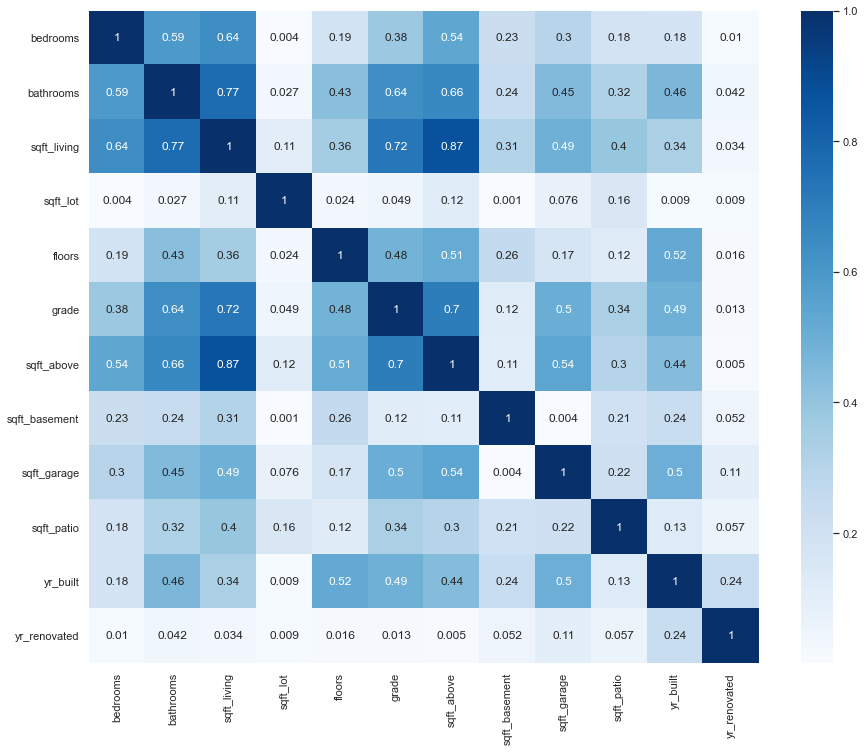

In [108]:
kc_colinearity = df_clean.drop(columns=['price', 'lat', 'long', 'id'])
corr = round(abs(kc_colinearity.corr()),3)
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(corr, cmap="Blues", annot=True);

We can see that there are some trouble spots in here, "sqft_living" has a collinear relationship with "sqft_above", followed by "bathrooms" and "bedrooms", if we use any of these variables it will be sqft_living.   We've already cleaned/prepared the other variable of interest, 'grade' so we can  we'll focus on examining and preparing "sqft_above" for use in a basic linear regression model. 

### Clean "sqft_living"

In [109]:
df_clean['sqft_living'].describe()

count    29044.000000
mean      2111.866478
std        926.036155
min          3.000000
25%       1440.000000
50%       1940.000000
75%       2620.000000
max      15360.000000
Name: sqft_living, dtype: float64

Our std of 926 indicates that we should also be looking for outliers- when considering mean house size, that's a pretty large margin of error (about 1/2 of the average sized house in KC) and so there must be houses that are exceptionally large that are skewing our model.  We can also see from our min value of 3 that there might be some errors and outliers on the smaller side too, we'll need to remove some of these.  However, we need to be very careful about how we do this, as removing data can lead to model manipulation and less acuuracy overall.  We'll remove all houses in the typical oulier range of 3%, to minimize model manipulation, but gain some accuracy in our predictions.  This will drop considerably fewer records than preserving the middle quartile range, so our model should still be fairly accurate.

In [148]:
q_low = df_clean['sqft_living'].quantile(0.03)

q_high = df_clean['sqft_living'].quantile(0.97)

In [149]:
kc_clean= df_clean[(df_clean['sqft_living']< q_high) & (df_clean['sqft_living']> q_low)]


In [150]:
len(df_clean)-len(kc_clean)

1767

In [113]:
kc_clean['sqft_living'].describe()

count    27257.000000
mean      2069.161390
std        761.660408
min        850.000000
25%       1470.000000
50%       1940.000000
75%       2570.000000
max       4180.000000
Name: sqft_living, dtype: float64

We can see that our std has dropped to 761 from 926 for sqft_living by dropping 1767 outliers out of 29,044 records.

In [151]:
# Build a model to fit a regression line and check the distribution of sqft_living 
yr=df_kc['price']
Xr=df_kc['sqft_living']

sgft_model_raw = sm.OLS(yr, sm.add_constant(Xr))
sqft_results_raw = sgft_model_raw.fit()


In [152]:
# Build a model to fit a regression line and check the distribution of sqft_living 
y=df_clean['price']
X=df_clean['sqft_living']

sgft_model = sm.OLS(y, sm.add_constant(X))
sqft_results = sgft_model.fit()


In [153]:
sqft_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                 1.424e+04
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:26:34   Log-Likelihood:            -4.2006e+05
No. Observations:               28642   AIC:                         8.401e+05
Df Residuals:                   28640   BIC:                         8.401e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.053e+05   8647.412     12.176      0.000    8.83e+04    1.22e+05
sqft_living   458.2126      3.840    119.338      0.000     450.687     465.738
==============================================================================
Omnibus:                    27222.276   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3861326.465
Skew:                           4.196   Prob(JB):                         0.00
Kurtosis:                      59.259   Cond. No.                     5.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Because our model is only explaining about 36% of the variation in our model we can see what we had assumed before- this model is lacking a predictor that explains the jump in price in addition to sqft_living.  Moreover the intercept of 10,800 doesn't make much sense, a house in any part of the country is bound to be more than that.  We'll have to dig deeper to see what other factors influence price.  In the meantime, let's take a look at the residuals to see if removing outliers had the desired effect on our data.

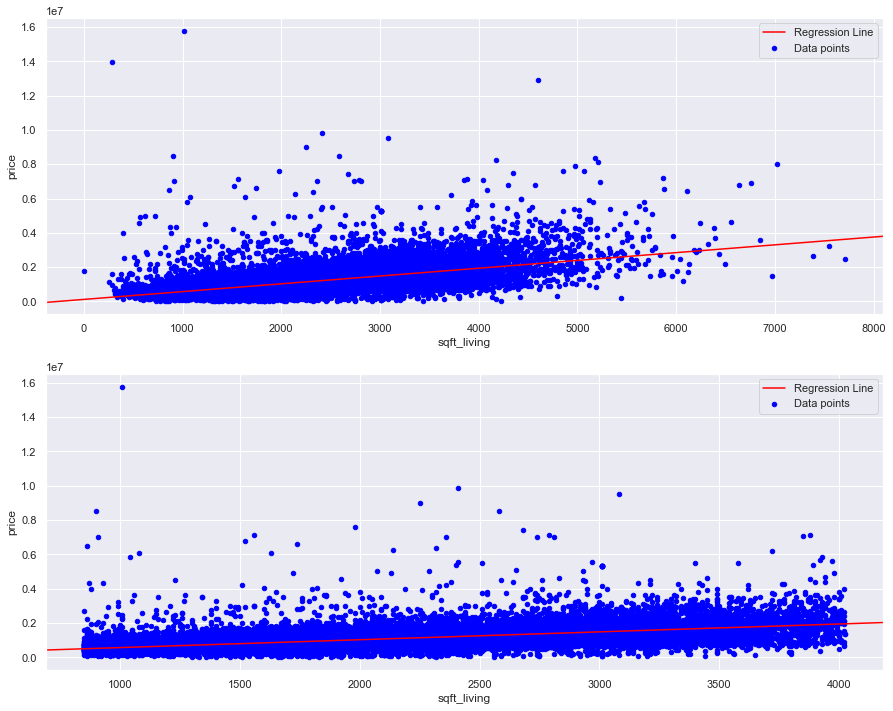

In [154]:
fig, (ax1,ax2) = plt.subplots(2)

df_clean.plot.scatter(x="sqft_living", y="price", label="Data points", color='blue', ax=ax1)
sm.graphics.abline_plot(model_results=sqft_results_raw, label="Regression Line", color='red', ax=ax1)
ax1.legend();

kc_clean.plot.scatter(x="sqft_living", y="price", label="Data points", color='blue', ax=ax2)
sm.graphics.abline_plot(model_results=sqft_results, label="Regression Line", color='red', ax=ax2)
ax2.legend();

### Clean Price
We can see that minimizing outliers makes our data more linear, but we're not actually seeing a sharp increase in price per sqft as expected.  Instead, it seems that price increases only marginally as sqft does.  We'll need to examine our other variables to see what else contributes to upticks in prices.  But before we do that, let's make sure that we're eliminating any outliers in price.  We'll define that as anything that's 3 or more times the std in price.

In [155]:
std_thresh = kc_clean.price.std()*3
kc_clean= kc_clean[kc_clean['price'] <= std_thresh]

### Summary: Numeric Variables

Our correlation matrix showed that sqft_living had the highest correlation to price.  And we can see from the plot above that when we remove outliers there's a linear relationship between sqft_living and price. However, Our basic model does little to shed light on the predictors that might help us understand home values in KC.  We'll need to examine some other variables to determine what features correlate most strongly to price.
 

## Review of Categorical Data
Lets' begin by looking at a model of all our categorical data to see which predictors would be the best candidates for including in our final model.

In [339]:
categoricals_clean = kc_clean.select_dtypes("object")
categoricals_clean=categoricals_clean.drop(['date', 'address', ], axis=1).copy()

In [342]:
y_raw_cat = kc_clean["price"]
X_raw_cat = categoricals_clean
X_raw_cat = pd.get_dummies(X_raw_cat)

X_raw_cat.drop(['waterfront_YES', 'greenbelt_YES',
               'nuisance_YES', 'condition_Poor',
               'heat_source_Electricity', 'sewer_system_PUBLIC', 'zip_98372'], 
               axis=1, inplace=True)


In [343]:
cat_model= sm.OLS(y_raw_cat, sm.add_constant(X_raw_cat))
cat_results = cat_model.fit()
cat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     223.4
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:52:24   Log-Likelihood:            -2.9242e+05
No. Observations:               21072   AIC:                         5.850e+05
Df Residuals:                   20980   BIC:                         5.857e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -4.043e+15   1.59e+16     -0.254      0.800   -3.53e+16    2.72e+16
waterfront_NO                   -7.394e+04   2.13e+04     -3.469      0.001   -1.16e+05   -3.22e+04
greenbelt_NO                    -7.306e+04   1.46e+04     -5.020      0.000   -1.02e+05   -4.45e+04
nuisance_NO                      4.984e+04   4760.403     10.471      0.000    4.05e+04    5.92e+04
view_NO                          4.043e+15   1.59e+16      0.254      0.800   -2.72e+16    3.53e+16
view_YES                         4.043e+15   1.59e+16      0.254      0.800   -2.72e+16    3.53e+16
condition_Average                2.041e+05   4.44e+04      4.595      0.000    1.17e+05    2.91e+05
condition_Fair                   2.538e+04    4.9e+04      0.518      0.605   -7.07e+04    1.21e+05
condition_Good                   2.247e+05   4.45e+04      5.052      0.000    1.38e+05    3.12e+05
condition_Very Good              2.761e+05   4.47e+04      6.183      0.000    1.89e+05    3.64e+05
heat_source_Electricity/Solar   -1.063e+05   3.93e+04     -2.706      0.007   -1.83e+05   -2.93e+04
heat_source_Gas                   8.36e+04   4677.734     17.872      0.000    7.44e+04    9.28e+04
heat_source_Gas/Solar            2.414e+05   3.61e+04      6.693      0.000    1.71e+05    3.12e+05
heat_source_Oil                  7824.2620   6634.445      1.179      0.238   -5179.762    2.08e+04
heat_source_Oil/Solar            9.408e+04   1.29e+05      0.728      0.467   -1.59e+05    3.47e+05
heat_source_Other                1.757e+04   8.68e+04      0.202      0.840   -1.53e+05    1.88e+05
sewer_system_PRIVATE            -2.231e+04   6701.499     -3.330      0.001   -3.54e+04   -9178.808
sewer_system_PRIVATE RESTRICTED  2.341e+05   2.58e+05      0.907      0.365   -2.72e+05     7.4e+05
sewer_system_PUBLIC RESTRICTED   2.429e+05   1.83e+05      1.331      0.183   -1.15e+05    6.01e+05
zip_98001                        -3.83e+05   1.83e+05     -2.096      0.036   -7.41e+05   -2.48e+04
zip_98002                         -5.1e+05   1.83e+05     -2.788      0.005   -8.69e+05   -1.51e+05
zip_98003                       -4.374e+05   1.83e+05     -2.392      0.017   -7.96e+05    -7.9e+04
zip_98004                        5.288e+05   1.86e+05      2.849      0.004    1.65e+05    8.93e+05
zip_98005                        4.056e+05   1.85e+05      2.194      0.028    4.33e+04    7.68e+05
zip_98006                        2.931e+05   1.83e+05      1.601      0.109   -6.57e+04    6.52e+05
zip_98007                        1.871e+05   1.84e+05      1.018      0.309   -1.73e+05    5.47e+05
zip_98008                        2.039e+05   1.83e+05      1.114      0.265   -1.55e+05    5.63e+05
zip_98011                        1.169e+05   1.83e+05      0.638      0.523   -2.42

In [344]:
results_raw = pd.concat([cat_results.params,
                         cat_results.pvalues], axis=1)
results_raw.columns = ["coefficient", "p-value"]
results_raw

,coefficient,p-value
const,-4.043074e+15,7.998251e-01
waterfront_NO,-7.393928e+04,5.235622e-04
greenbelt_NO,-7.306017e+04,5.208371e-07
nuisance_NO,4.984480e+04,1.361755e-25
view_NO,4.043074e+15,7.998251e-01
...,...,...
zip_98338,-2.441608e+05,3.438267e-01
zip_98354,-3.945961e+05,3.799779e-02
zip_98387,-2.355569e+05,4.558271e-01
zip_98422,-7.996356e+05,1.139882e-02


In [298]:
results_df = results_df[results_df["p-value"] < 0.05].sort_values(by="coefficient", ascending=False)
results_df.head(10)

,coefficient,p-value
const,1.409489e+06,2.244375e-08
sqft_living,2.078278e+02,0.000000e+00
waterfront_NO,-1.899096e+05,1.233002e-27
zip_98075,-4.357565e+05,4.581818e-02
zip_98006,-4.462020e+05,4.065393e-02
zip_98109,-4.596916e+05,3.566637e-02
zip_98007,-4.684363e+05,3.200748e-02
zip_98119,-4.706768e+05,3.100343e-02
zip_98029,-4.795430e+05,2.786516e-02
zip_98074,-4.811834e+05,2.731604e-02


Our model is statistically significant. There's strong muticollinearity between our variables so moving forward we'll select our predictors more carefully.  Many of our variables are statistically significant, with a significant coefficient value as well.  As expected we see see variables like 'greenbelt_NO', 'waterfront_NO' make a big difference in 'price', as do many of our zips.  Because we dropped the zip code in our model that was closest to the mean price, we can say that for each'zip' we could add or subtract the coefficient value from our intercept of 1,409,489 to find the gain or loss from the mean value of a house in that zipcode. But for such a high number of predictors we would have expected to see a larger adjusted r-squared.  Our model is clearly missing at least one big component, sqft_living from the numeric predictors.  Before we add that back in let's get a closer look at how our predictors interact with mean 'price', starting with our engineered column, 'zip'.

### Clean 'zip'

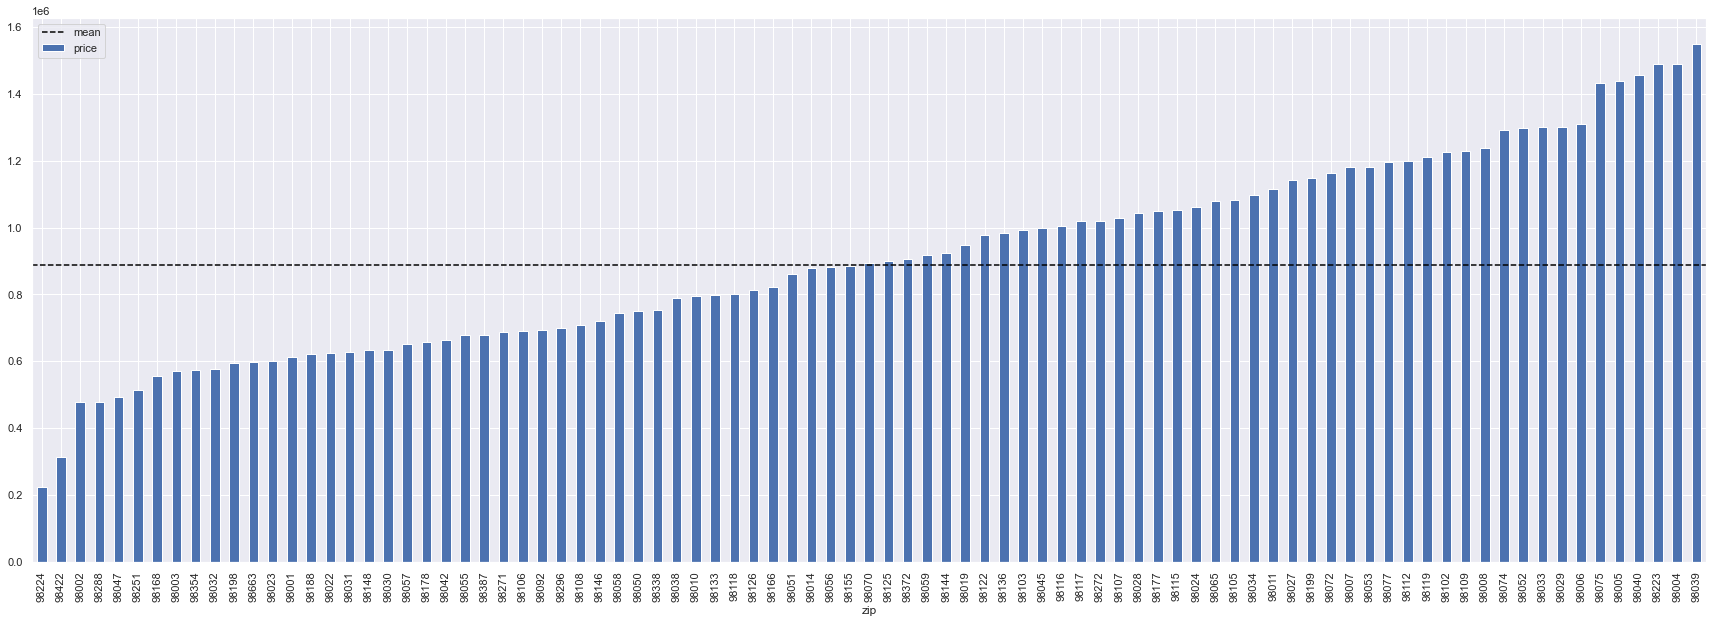

In [159]:
fig, ax = plt.subplots(figsize=(30,10))
kc_clean.groupby("zip").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [123]:
#That's a bit hard to read, let's take a closer look
kc_clean.groupby("zip").mean().sort_values(by="price").head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
zip,,,,,,,,,,,,,,,,
98224,4.017755e+09,224500.000000,2.000000,1.000000,1095.000000,62548.000000,1.250000,5.000000,1095.000000,0.000000,0.000000,110.000000,1950.000000,0.000000,47.768195,-121.481475
98422,1.021039e+09,312750.000000,3.000000,2.000000,2480.000000,6615.000000,2.000000,7.000000,1860.000000,620.000000,0.000000,600.000000,1988.000000,0.000000,47.318740,-122.416100
98002,4.809055e+09,476596.355301,3.286533,1.852436,1577.300860,8215.527221,1.282235,5.684814,1477.618911,205.229226,261.449857,105.819484,1963.303725,97.587393,47.305328,-122.213452
98288,3.867125e+09,478176.923077,2.846154,1.461538,1589.230769,100857.230769,1.500000,5.538462,1412.307692,263.846154,0.000000,401.538462,1952.230769,767.230769,47.710359,-121.332867
98047,5.137973e+09,494134.315789,3.315789,2.085526,1619.039474,10052.315789,1.500000,5.763158,1561.144737,87.763158,388.513158,121.250000,1985.407895,52.592105,47.264319,-122.246684


A very clear mostly linear relationship between price and neighborhoods exists when grouped and sorted by mean price of home for "zip", moving forward it would be interesting to see this mapped out, with a mean price per neighborhood as a pop out on an interactive map.  At the very least, we now have a way of listing neighborhoods where mean house prices are below the mean house price for the Seattle area, which will be helpful for our thrifty agent.  We should note that the linear realtionship between zips and price only existsl when grouped by price, so it will not make for a good candidate for our final model.  But we can use it to limit the kinds of houses we're interested in; Kings county covers roughly 10% of the area of Washington state, and many of these neighborhoods lay far outside the incorporated area of Seattle.  Our client is only interested in the neighborhoods fully inside that boundry line, so let's drop all zipcodes from outside the Seattle city limits.

In [160]:
outer_limits= ['98077','98053', '98014', '98019', '98224', '98024', '98065',
'98027', '98045', '98038', '98022', '98051', '98010']
kc_clean = kc_clean[~df_clean['zip'].isin(outer_limits)]


<ipython-input-160-11d24d350a9d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kc_clean = kc_clean[~df_clean['zip'].isin(outer_limits)]


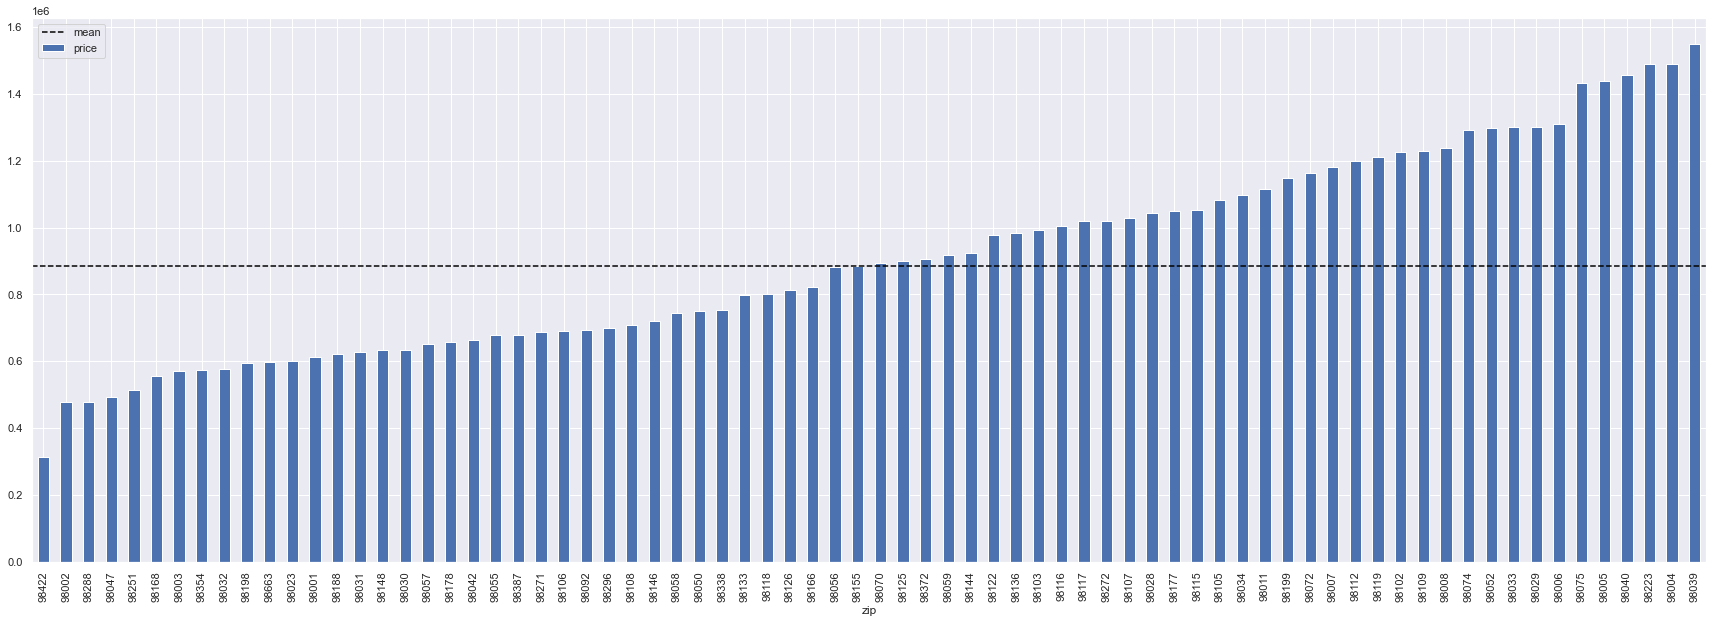

In [161]:
#check mean of zips again
fig, ax = plt.subplots(figsize=(30,10))
kc_clean.groupby("zip").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

### Review Other Potential Predictors

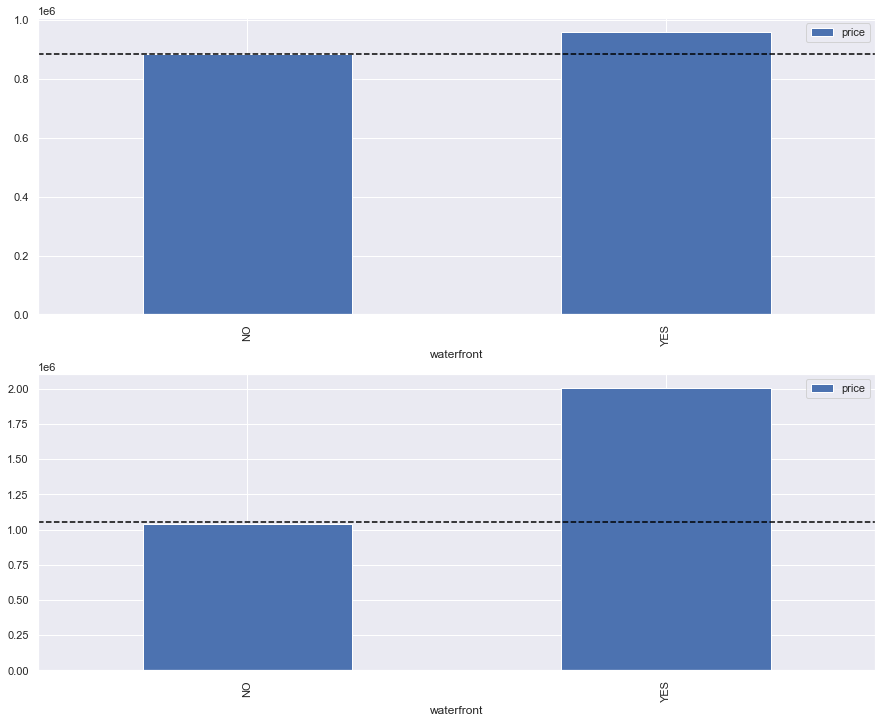

In [162]:
# Waterfront sns.barplot(data=df, x='waterfront', y='price')
fig, (ax1, ax2) = plt.subplots(2)
kc_clean.groupby("waterfront").mean().sort_values(by="price").plot.bar(y="price", ax=ax1)
ax1.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")
df_kc.groupby("waterfront").mean().sort_values(by="price").plot.bar(y="price", ax=ax2)
ax2.axhline(y=df_kc["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [137]:
print("Clean", kc_clean['waterfront'].value_counts())
print("Original", df_kc['waterfront'].value_counts())

Clean NO     21539
YES      179
Name: waterfront, dtype: int64
Original NO     29469
YES      486
Name: waterfront, dtype: int64


There's clearly a relationship between "price" and waterfront views in our unedited df.  If we hadn't removed outliers we also would need to pay greater attention to the fact that there are very few houses that are on the waterfront, only 486 out of 29,555.  Even now, with only 179 houses the mean price for a waterfront home is still above the regional average.  While outlier values for things like sqft can be viewed easily with a scatterplot, it would have been easy to overlook the outlier qualities of a variable like 'waterfront' without looking more closely at the value counts.  This might be a good candidate for an interaction term with sqft_living if we transform the values from 'NO' and 'YES' to 1 and 2 respectively.  This way the numeric values can be multiplied by 'sqft_living' to better reflect the value of a waterfront home.

There's also likely strong colinearity between "zips" and "waterfront_YES", so as stated before, we should check for colinearity warnings if used in the same model.

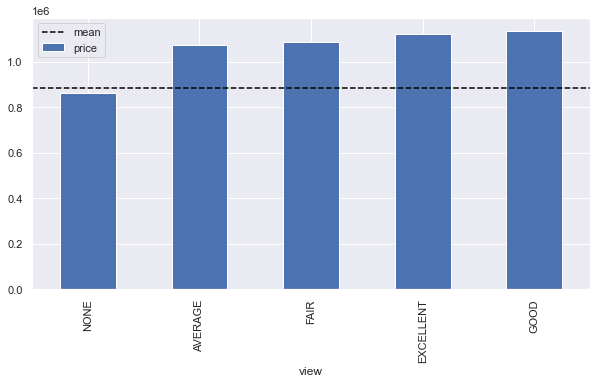

In [163]:
#view
fig, ax = plt.subplots(figsize=(10,5))
kc_clean.groupby("view").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [140]:
kc_clean['view'].value_counts()

NONE         19661
AVERAGE       1253
GOOD           467
EXCELLENT      186
FAIR           151
Name: view, dtype: int64

Not looking great... "good" and excellent look about equal. We can see that houses with no views tend to have mean sales prices that fall below the average price of a house in our cleaned KC data, whereas houses with even an average view are above the mean.  Looking at the value counts, there's again a disproportionate number of houses that do not have views (19661), much like our issue with waterfront. Let's revamp our "view' to boolean yes/no values

In [221]:
view_dict = { 'NONE':'NO', "AVERAGE":"YES", "GOOD":"YES", "EXCELLENT": "YES", "FAIR": "YES" }
kc_clean.view.replace(to_replace=view_dict,inplace=True)


In [222]:
kc_clean['view'].value_counts()

NO     19153
YES     1919
Name: view, dtype: int64

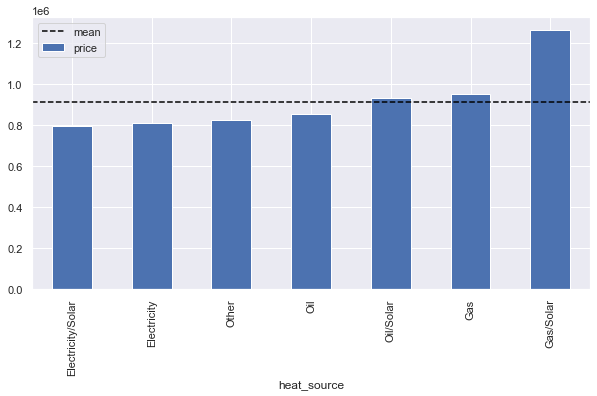

In [141]:
fig, ax = plt.subplots(figsize=(10,5))
kc_clean.groupby("heat_source").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

I was curious if having solar power would add to the value of a house, but it looks like only houses that are equipped with gas and solar power experience an uptick in price compared to the median home price in Seattle.  However, it could be that other factors are at play.  Most large houses are unable to run exclusively on solar, and would need a backup for generating heat, hence the gas/solar mix.  There's also a statistically significant relationship between price and sqft so eco-freindly solar only smaller homes would be more likely to have smaller square footage, depressing their sales value. 

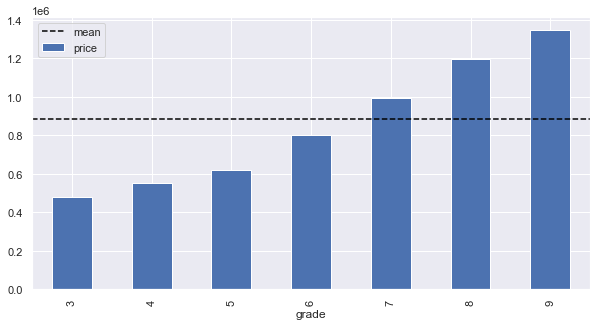

In [164]:

fig, ax = plt.subplots(figsize=(10,5))
kc_clean.groupby("grade").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [165]:
kc_clean['grade'].value_counts()

6    9999
7    6784
5    2022
8    1829
9     280
4     155
3       3
Name: grade, dtype: int64

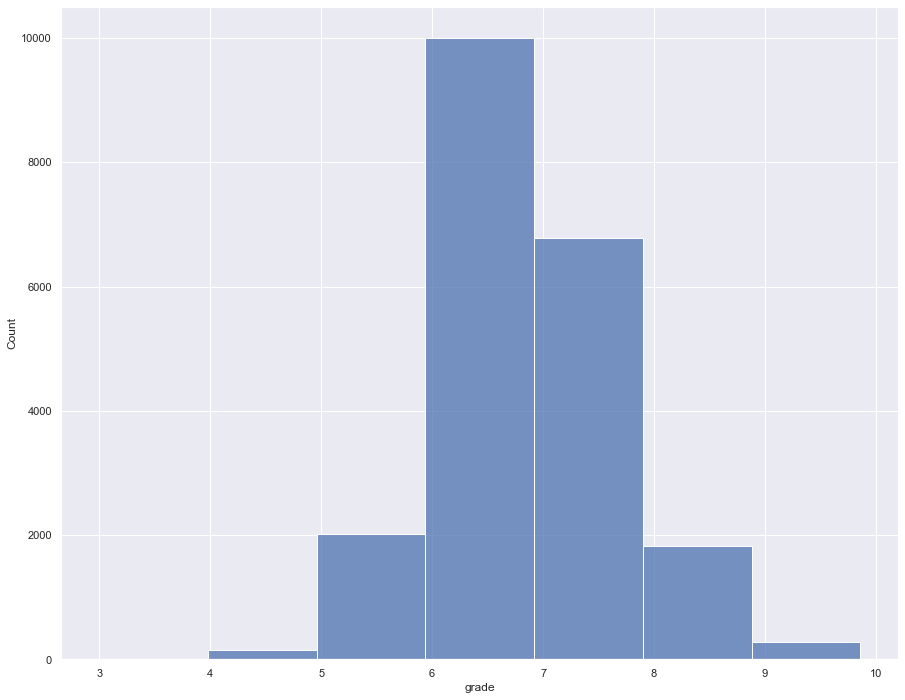

In [167]:
sns.histplot(data=kc_clean, x="grade", binwidth=.98);


This is looking very promising.  Not only does our cleaned grade have a linear relationship to price, it also has an almost normal distribution before any other kind of transformation. 

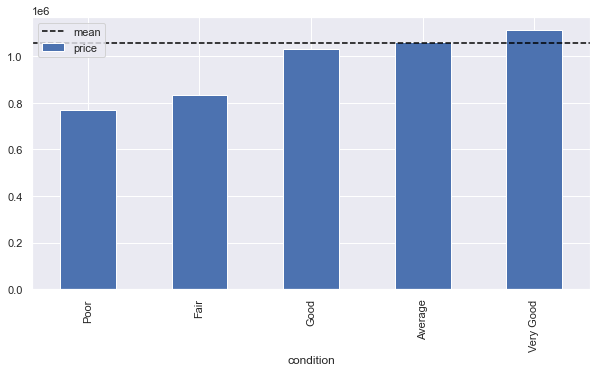

In [287]:
fig, ax = plt.subplots(figsize=(10,5))
kc_clean.groupby("condition").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [168]:
kc_clean['condition'].value_counts()

Average      12312
Good          6152
Very Good     2423
Fair           151
Poor            34
Name: condition, dtype: int64

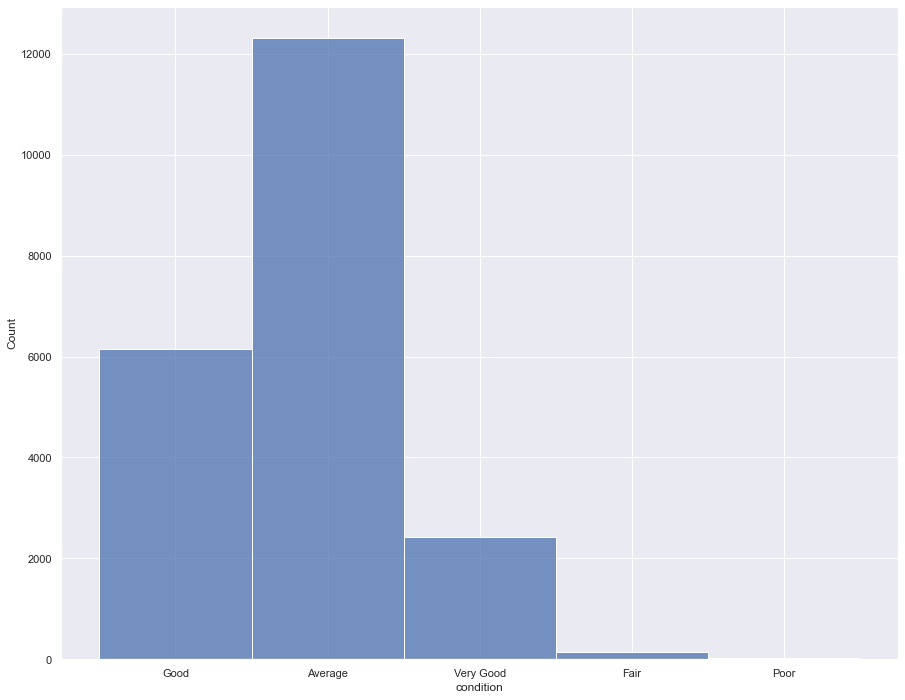

In [169]:
sns.histplot(data=kc_clean, x="condition", binwidth=1);


With the adjustments we made to grade, we would likely not need to use condition, which has an non-linear distribution anyway, making it more of a challange to use in a linear regression model.

### Summary: Categorical Variables

Of the categorical variables, waterfront, zip (when grouped by mean), and grade have the most linear relationships with price. However, knowing that we'll want to exclude zip codes in at least one of our models to identify the change in our mean home price for each neighborhood, we'll use grade both to avoid potential co-linearity between 'zip' and 'waterfront', but also because we know our client isn't interested in houses with extra features or amenities that will bump up price.  

## Final Models

### Putting it all together: Using SqFt, Grade, Zip, Waterfront, and Greenbelt to Locate Affordable Neighborhoods 
Our first model will be unchanged by any kind of linear or logarithmic transformations. 

If the model is correctly specified, then we should see an even distribution of the residuals in a scatter plot

In [299]:
y_baseline = kc_clean["price"]
X_baseline = kc_clean[['grade', 'zip', 'sqft_living', 'waterfront', 'greenbelt']]
X_baseline = pd.get_dummies(X_baseline, columns=['zip', 'grade', 'waterfront', 'greenbelt'])
X_baseline.drop(['zip_98039', 'grade_3', 'waterfront_YES', 'greenbelt_YES'], axis=1, inplace=True)


In [300]:
baseline_model = sm.OLS(y_baseline, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     451.6
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:09:05   Log-Likelihood:            -2.8884e+05
No. Observations:               21072   AIC:                         5.778e+05
Df Residuals:                   20989   BIC:                         5.785e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.409e+06   2.52e+05      5.594      0.000    9.16e+05     1.9e+06
sqft_living     207.8278      2.856     72.762      0.000     202.229     213.426
zip_98001     -1.066e+06   2.18e+05     -4.894      0.000   -1.49e+06   -6.39e+05
zip_98002     -1.076e+06   2.18e+05     -4.937      0.000    -1.5e+06   -6.49e+05
zip_98003     -1.078e+06   2.18e+05     -4.946      0.000    -1.5e+06   -6.51e+05
zip_98004     -1.812e+05    2.2e+05     -0.825      0.409   -6.11e+05    2.49e+05
zip_98005      -2.89e+05   2.19e+05     -1.319      0.187   -7.18e+05     1.4e+05
zip_98006     -4.462e+05   2.18e+05     -2.047      0.041   -8.73e+05    -1.9e+04
zip_98007     -4.684e+05   2.18e+05     -2.144      0.032   -8.97e+05   -4.03e+04
zip_98008     -4.163e+05   2.18e+05     -1.910      0.056   -8.43e+05    1.08e+04
zip_98011     -6.154e+05   2.18e+05     -2.822      0.005   -1.04e+06   -1.88e+05
zip_98023     -1.088e+06   2.18e+05     -4.996      0.000   -1.51e+06   -6.61e+05
zip_98028      -6.86e+05   2.18e+05     -3.148      0.002   -1.11e+06   -2.59e+05
zip_98029     -4.795e+05   2.18e+05     -2.199      0.028   -9.07e+05   -5.22e+04
zip_98030     -1.045e+06   2.18e+05     -4.798      0.000   -1.47e+06   -6.18e+05
zip_98031     -1.035e+06   2.18e+05     -4.750      0.000   -1.46e+06   -6.08e+05
zip_98032     -1.046e+06   2.18e+05     -4.792      0.000   -1.47e+06   -6.18e+05
zip_98033     -3.449e+05   2.18e+05     -1.582      0.114   -7.72e+05    8.23e+04
zip_98034     -5.477e+05   2.18e+05     -2.515      0.012   -9.75e+05   -1.21e+05
zip_98040      -2.94e+05   2.19e+05     -1.344      0.179   -7.23e+05    1.35e+05
zip_98042     -1.042e+06   2.18e+05     -4.785      0.000   -1.47e+06   -6.15e+05
zip_98047     -1.066e+06   2.19e+05     -4.867      0.000    -1.5e+06   -6.37e+05
zip_98050     -7.694e+05   3.08e+05     -2.500      0.012   -1.37e+06   -1.66e+05
zip_98052     -4.086e+05   2.18e+05     -1.876      0.061   -8.36e+05    1.84e+04
zip_98055     -1.001e+06   2.18e+05     -4.591      0.000   -1.43e+06   -5.74e+05
zip_98056     -8.054e+05   2.18e+05     -3.698      0.000   -1.23e+06   -3.78e+05
zip_98057     -9.614e+05   2.19e+05     -4.398      0.000   -1.39e+06   -5.33e+05
zip_98058     -9.668e+05   2.18e+05     -4.440      0.000   -1.39e+06    -5.4e+05
zip_98059     -8.103e+05   2.18e+05     -3.720      0.000   -1.24e+06   -3.83e+05
zip_98070     -7.926e+05   2.18e+05     -3.631      0.000   -1.22e+06   -3.65e+05
zip_98072     -5.897e+05   2.18e+05     -2.705      0.007   -1.02e+06   -1.62e+05
zip_98074     -4.812e+05   2.18e+05     -2.207      0.027   -9.09e+05   -5.39e+04
zip_98075     -4.358e+05   2.18e+05     -1.997      0.046   -8.63e+05   -8096.024
zip_98092     -1.066e+06   2.18e+05     -4.897      0.000   -1.49e+06    -6.4e+05
zip_98102     -4.957e+05   2.19e+05     -2.267   

We can see that our model explains 64% of the variation in it by the r-squared value.   The model is statistically significant overall as demonstrated by the Prob(F-statistic), as are all of our predictors.  We can reject the null hypothesis that neighborhood, home size and house grade have no impact on price.  We do see  co-linearity warnings, so there may be colinearity between grade and sqft_living. We do, however, have what appears to be an reasonable intercept of $1,409,000, although that's a large mean price it seems in line with what we could expect to pay for a home or apartment in a top tier metro area.  We'll also want to check our MAE, or mean absolute error, to see by how much our model may be off.  Our Durbin-Watson value is *JUST* between the desired 1-2 ANd the JB values also pretty reasonable given the scale of our y variable (homeprices).  We will run a test to check for homoscedasticity when we examine our models limitations.

In [301]:
# df with coeffiient and p-value.  Will use sorted ce's to find least expensive neighborhoods.
results_df = pd.concat([baseline_results.params, baseline_results.pvalues], axis=1)
results_df.columns = ["coefficient", "p-value"]


In [304]:
# check to see how many predictors are statistically significant- 68 out of 80 is not bad!
results_df = results_df[results_df["p-value"] < 0.05].sort_values(by="coefficient", ascending=False)
results_df.head(20)

,coefficient,p-value
const,1.409489e+06,2.244375e-08
sqft_living,2.078278e+02,0.000000e+00
waterfront_NO,-1.899096e+05,1.233002e-27
zip_98075,-4.357565e+05,4.581818e-02
zip_98006,-4.462020e+05,4.065393e-02
zip_98109,-4.596916e+05,3.566637e-02
zip_98007,-4.684363e+05,3.200748e-02
zip_98119,-4.706768e+05,3.100343e-02
zip_98029,-4.795430e+05,2.786516e-02
zip_98074,-4.811834e+05,2.731604e-02


In [305]:
# what's our mean error going to be?
mae_baseline = baseline_results.resid.abs().sum() / len(y_raw)
print(mae_baseline) 

155937.08560853227


That's not too bad, but it's a little high, even for real estate. Let's look at a plot of our residuals to help decide what our next steps should be (if any).

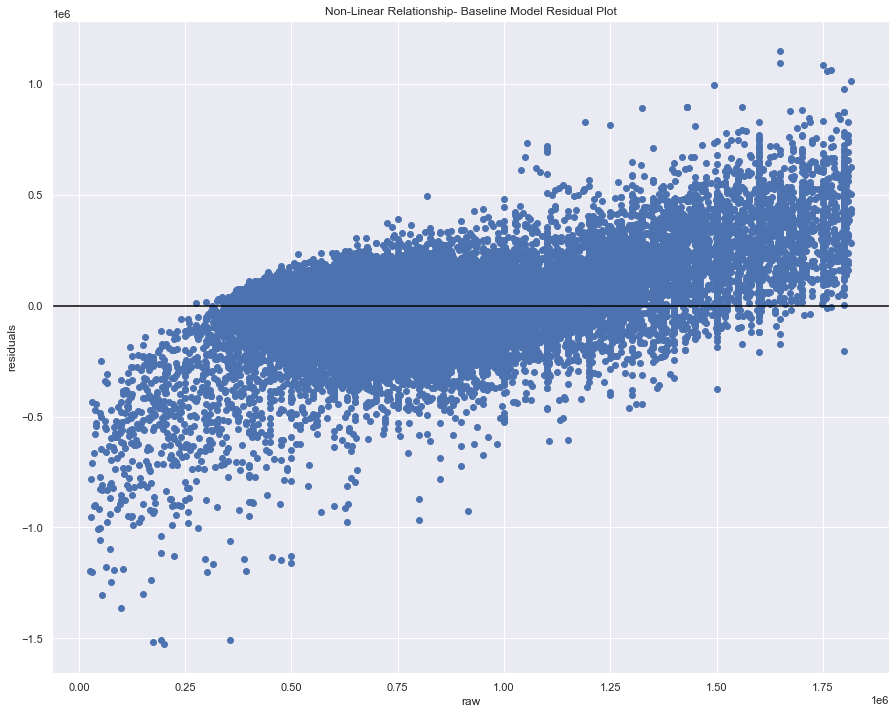

In [308]:

fig, ax = plt.subplots()

ax.scatter(y_baseline, baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("raw")
ax.set_ylabel("residuals")
ax.set_title("Non-Linear Relationship- Baseline Model Residual Plot");

Not too bad!  Definitely not a perfectly normal distribution- it seems like we could log transform our data to improve our residuals after we center our model. But first let's mean center our data to improve interpretability.


### 2nd Model:  Centering Data to Improve Interpretability 

In [330]:
y_centered = y_baseline.copy()
X_centered = X_raw.copy()

In [331]:
for col in X_centered.columns:
    X_centered[col] = X_centered[col] - X_centered[col].mean()
    
X_centered.describe()

,sqft_living,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98011,...,zip_98422,zip_98663,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,waterfront_NO,greenbelt_NO
count,2.107200e+04,2.107200e+04,2.107200e+04,2.107200e+04,2.107200e+04,2.107200e+04,2.107200e+04,2.107200e+04,2.107200e+04,2.107200e+04,...,2.107200e+04,2.107200e+04,2.107200e+04,2.107200e+04,2.107200e+04,2.107200e+04,2.107200e+04,2.107200e+04,2.107200e+04,2.107200e+04
mean,8.649523e-14,2.149635e-18,-2.360383e-18,-4.762916e-18,-4.214970e-20,8.429939e-20,1.011593e-18,2.318233e-18,-5.479461e-19,-1.306641e-18,...,2.370920e-20,-2.107485e-20,-1.549001e-18,-1.521604e-17,4.754486e-17,-1.804007e-17,-1.281351e-17,4.805065e-18,7.924143e-18,-5.530040e-17
std,6.569329e+02,1.676654e-01,1.276273e-01,1.405813e-01,5.148416e-02,5.915744e-02,1.190512e-01,7.740100e-02,1.224832e-01,1.047950e-01,...,6.888856e-03,9.742083e-03,8.545158e-02,2.945389e-01,4.993620e-01,4.672327e-01,2.815450e-01,1.145069e-01,8.919740e-02,1.254502e-01
min,-1.059310e+03,-2.894837e-02,-1.656226e-02,-2.016894e-02,-2.657555e-03,-3.511769e-03,-1.437927e-02,-6.026955e-03,-1.523349e-02,-1.110478e-02,...,-4.745634e-05,-9.491268e-05,-7.355733e-03,-9.595672e-02,-4.745159e-01,-3.219438e-01,-8.679765e-02,-1.328778e-02,-9.919799e-01,-9.840072e-01
25%,-5.093099e+02,-2.894837e-02,-1.656226e-02,-2.016894e-02,-2.657555e-03,-3.511769e-03,-1.437927e-02,-6.026955e-03,-1.523349e-02,-1.110478e-02,...,-4.745634e-05,-9.491268e-05,-7.355733e-03,-9.595672e-02,-4.745159e-01,-3.219438e-01,-8.679765e-02,-1.328778e-02,8.020121e-03,1.599279e-02
50%,-9.930989e+01,-2.894837e-02,-1.656226e-02,-2.016894e-02,-2.657555e-03,-3.511769e-03,-1.437927e-02,-6.026955e-03,-1.523349e-02,-1.110478e-02,...,-4.745634e-05,-9.491268e-05,-7.355733e-03,-9.595672e-02,-4.745159e-01,-3.219438e-01,-8.679765e-02,-1.328778e-02,8.020121e-03,1.599279e-02
75%,4.206901e+02,-2.894837e-02,-1.656226e-02,-2.016894e-02,-2.657555e-03,-3.511769e-03,-1.437927e-02,-6.026955e-03,-1.523349e-02,-1.110478e-02,...,-4.745634e-05,-9.491268e-05,-7.355733e-03,-9.595672e-02,5.254841e-01,6.780562e-01,-8.679765e-02,-1.328778e-02,8.020121e-03,1.599279e-02
max,2.115690e+03,9.710516e-01,9.834377e-01,9.798311e-01,9.973424e-01,9.964882e-01,9.856207e-01,9.939730e-01,9.847665e-01,9.888952e-01,...,9.999525e-01,9.999051e-01,9.926443e-01,9.040433e-01,5.254841e-01,6.780562e-01,9.132024e-01,9.867122e-01,8.020121e-03,1.599279e-02


In [332]:
X_centered_model = sm.OLS(y_centered, sm.add_constant(X_centered))
X_centered_results = X_centered_model.fit()
X_centered_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     451.6
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:49:22   Log-Likelihood:            -2.8884e+05
No. Observations:               21072   AIC:                         5.778e+05
Df Residuals:                   20989   BIC:                         5.785e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.841e+05   1498.883    589.860      0.000    8.81e+05    8.87e+05
sqft_living     207.8278      2.856     72.762      0.000     202.229     213.426
zip_98001     -1.066e+06   2.18e+05     -4.894      0.000   -1.49e+06   -6.39e+05
zip_98002     -1.076e+06   2.18e+05     -4.937      0.000    -1.5e+06   -6.49e+05
zip_98003     -1.078e+06   2.18e+05     -4.946      0.000    -1.5e+06   -6.51e+05
zip_98004     -1.812e+05    2.2e+05     -0.825      0.409   -6.11e+05    2.49e+05
zip_98005      -2.89e+05   2.19e+05     -1.319      0.187   -7.18e+05     1.4e+05
zip_98006     -4.462e+05   2.18e+05     -2.047      0.041   -8.73e+05    -1.9e+04
zip_98007     -4.684e+05   2.18e+05     -2.144      0.032   -8.97e+05   -4.03e+04
zip_98008     -4.163e+05   2.18e+05     -1.910      0.056   -8.43e+05    1.08e+04
zip_98011     -6.154e+05   2.18e+05     -2.822      0.005   -1.04e+06   -1.88e+05
zip_98023     -1.088e+06   2.18e+05     -4.996      0.000   -1.51e+06   -6.61e+05
zip_98028      -6.86e+05   2.18e+05     -3.148      0.002   -1.11e+06   -2.59e+05
zip_98029     -4.795e+05   2.18e+05     -2.199      0.028   -9.07e+05   -5.22e+04
zip_98030     -1.045e+06   2.18e+05     -4.798      0.000   -1.47e+06   -6.18e+05
zip_98031     -1.035e+06   2.18e+05     -4.750      0.000   -1.46e+06   -6.08e+05
zip_98032     -1.046e+06   2.18e+05     -4.792      0.000   -1.47e+06   -6.18e+05
zip_98033     -3.449e+05   2.18e+05     -1.582      0.114   -7.72e+05    8.23e+04
zip_98034     -5.477e+05   2.18e+05     -2.515      0.012   -9.75e+05   -1.21e+05
zip_98040      -2.94e+05   2.19e+05     -1.344      0.179   -7.23e+05    1.35e+05
zip_98042     -1.042e+06   2.18e+05     -4.785      0.000   -1.47e+06   -6.15e+05
zip_98047     -1.066e+06   2.19e+05     -4.867      0.000    -1.5e+06   -6.37e+05
zip_98050     -7.694e+05   3.08e+05     -2.500      0.012   -1.37e+06   -1.66e+05
zip_98052     -4.086e+05   2.18e+05     -1.876      0.061   -8.36e+05    1.84e+04
zip_98055     -1.001e+06   2.18e+05     -4.591      0.000   -1.43e+06   -5.74e+05
zip_98056     -8.054e+05   2.18e+05     -3.698      0.000   -1.23e+06   -3.78e+05
zip_98057     -9.614e+05   2.19e+05     -4.398      0.000   -1.39e+06   -5.33e+05
zip_98058     -9.668e+05   2.18e+05     -4.440      0.000   -1.39e+06    -5.4e+05
zip_98059     -8.103e+05   2.18e+05     -3.720      0.000   -1.24e+06   -3.83e+05
zip_98070     -7.926e+05   2.18e+05     -3.631      0.000   -1.22e+06   -3.65e+05
zip_98072     -5.897e+05   2.18e+05     -2.705      0.007   -1.02e+06   -1.62e+05
zip_98074     -4.812e+05   2.18e+05     -2.207      0.027   -9.09e+05   -5.39e+04
zip_98075     -4.358e+05   2.18e+05     -1.997      0.046   -8.63e+05   -8096.024
zip_98092     -1.066e+06   2.18e+05     -4.897      0.000   -1.49e+06    -6.4e+05
zip_98102     -4.957e+05   2.19e+05     -2.267   

Ok!  This makes our coefficiants much more interpretable.  Our intercept is now 841,000, or the mean price of a house in our slice of incorporated King County.  We dropped our most expenzive zipcode, 'zip_98039' from the dataframe, so we can say that for any given zipcode the mean price is x percent smaller than our most expensive zip. We can also see that just by elimating waterfront houses, our client can expect to see a 189,900 drop in the mean price of a home, and that by avoiding greenbelt access they could expect to see a much smaller drop of $5656 from the mean.  With that in mind, it might be worth it to target areas in more affordable neighborhoods near parks and other greenbelt amenities.


In [320]:
results2_df = pd.concat([X_centered_results.params,
                         X_centered_results.pvalues], axis=1)
results2_df.columns = ["coefficient", "p-value"]
results2_df

,coefficient,p-value
const,8.841308e+05,0.000000e+00
sqft_living,2.078278e+02,0.000000e+00
zip_98001,-1.065713e+06,9.963414e-07
zip_98002,-1.075707e+06,8.006502e-07
zip_98003,-1.077549e+06,7.615076e-07
...,...,...
grade_7,7.434088e+04,5.552898e-01
grade_8,1.680840e+05,1.827572e-01
grade_9,1.906198e+05,1.327646e-01
waterfront_NO,-1.899096e+05,1.233002e-27


In [321]:
results2_df = results2_df[results2_df["p-value"] < 0.05].sort_values(by="coefficient")
results2_df.sort_values(by="coefficient", ascending=False)

,coefficient,p-value
const,8.841308e+05,0.000000e+00
sqft_living,2.078278e+02,0.000000e+00
waterfront_NO,-1.899096e+05,1.233002e-27
zip_98075,-4.357565e+05,4.581818e-02
zip_98006,-4.462020e+05,4.065393e-02
...,...,...
zip_98002,-1.075707e+06,8.006502e-07
zip_98003,-1.077549e+06,7.615076e-07
zip_98023,-1.088001e+06,5.887491e-07
zip_98288,-1.132515e+06,5.378449e-07


In [316]:
# Our mean error gshould remain the same
mae_baseline = X_centered_results.resid.abs().sum() / len(y_raw)
print(mae_baseline) 

155937.0856085364


### 3rd Model: Log Transform 'price'


For this model we'll log transform sqft_living to deal with our linearity issues.

In [323]:
X_log=X_baseline.copy()
X_log["log_sqft_living"] = np.log(X_log['sqft_living'])
X_log.drop('sqft_living', axis=1, inplace=True)


In [324]:
y_log = y_baseline
X_log_model = sm.OLS(y_log, sm.add_constant(X_log))
X_log_results = X_log_model.fit()
X_log_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     450.2
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:36:14   Log-Likelihood:            -2.8886e+05
No. Observations:               21072   AIC:                         5.779e+05
Df Residuals:                   20989   BIC:                         5.785e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.117e+06   2.55e+05     -4.379      0.000   -1.62e+06   -6.17e+05
zip_98001       -1.054e+06   2.18e+05     -4.833      0.000   -1.48e+06   -6.26e+05
zip_98002       -1.063e+06   2.18e+05     -4.873      0.000   -1.49e+06   -6.35e+05
zip_98003       -1.066e+06   2.18e+05     -4.887      0.000   -1.49e+06   -6.38e+05
zip_98004       -1.752e+05    2.2e+05     -0.797      0.425   -6.06e+05    2.55e+05
zip_98005       -2.843e+05   2.19e+05     -1.296      0.195   -7.14e+05    1.46e+05
zip_98006       -4.352e+05   2.18e+05     -1.995      0.046   -8.63e+05   -7603.107
zip_98007       -4.643e+05   2.19e+05     -2.123      0.034   -8.93e+05   -3.57e+04
zip_98008       -4.075e+05   2.18e+05     -1.868      0.062   -8.35e+05    2.01e+04
zip_98011       -6.052e+05   2.18e+05     -2.773      0.006   -1.03e+06   -1.77e+05
zip_98023       -1.079e+06   2.18e+05     -4.951      0.000   -1.51e+06   -6.52e+05
zip_98028       -6.718e+05   2.18e+05     -3.080      0.002    -1.1e+06   -2.44e+05
zip_98029       -4.745e+05   2.18e+05     -2.174      0.030   -9.02e+05   -4.67e+04
zip_98030       -1.039e+06   2.18e+05     -4.764      0.000   -1.47e+06   -6.12e+05
zip_98031       -1.026e+06   2.18e+05     -4.707      0.000   -1.45e+06   -5.99e+05
zip_98032       -1.034e+06   2.18e+05     -4.733      0.000   -1.46e+06   -6.06e+05
zip_98033       -3.367e+05   2.18e+05     -1.543      0.123   -7.64e+05    9.09e+04
zip_98034       -5.396e+05   2.18e+05     -2.475      0.013   -9.67e+05   -1.12e+05
zip_98040       -2.865e+05   2.19e+05     -1.308      0.191   -7.16e+05    1.43e+05
zip_98042       -1.028e+06   2.18e+05     -4.718      0.000   -1.46e+06   -6.01e+05
zip_98047       -1.061e+06   2.19e+05     -4.840      0.000   -1.49e+06   -6.31e+05
zip_98050       -7.882e+05   3.08e+05     -2.559      0.011   -1.39e+06   -1.84e+05
zip_98052       -4.017e+05   2.18e+05     -1.842      0.065   -8.29e+05    2.57e+04
zip_98055       -9.931e+05   2.18e+05     -4.549      0.000   -1.42e+06   -5.65e+05
zip_98056       -7.948e+05   2.18e+05     -3.645      0.000   -1.22e+06   -3.67e+05
zip_98057       -9.484e+05   2.19e+05     -4.334      0.000   -1.38e+06    -5.2e+05
zip_98058       -9.565e+05   2.18e+05     -4.389      0.000   -1.38e+06   -5.29e+05
zip_98059       -7.969e+05   2.18e+05     -3.655      0.000   -1.22e+06    -3.7e+05
zip_98070       -7.821e+05   2.18e+05     -3.580      0.000   -1.21e+06   -3.54e+05
zip_98072       -5.788e+05   2.18e+05     -2.653      0.008   -1.01e+06   -1.51e+05
zip_98074       -4.787e+05   2.18e+05     -2.194      0.028   -9.06e+05    -5.1e+04
zip_98075       -4.205e+05   2.18e+05     -1.926      0.054   -8.49e+05    7545.060
zip_98092       -1.054e+06   2.18e+05     -4.836      0.000   -1.48e+06   -6.27e+05
zip_98102        -4.95e+05   2.19e+05     -2.262      0.024

Now that we've log transformed sqft_living we'd have to desribe it's coefficients using percentages rather than dollar increase.  But before we take time to describe the changes (if any) we want to check to see if our residuals are better distributed- if not we'll need to choose another method of transformation to norm our data.

In [257]:
mae_baseline = baseline_results.resid.abs().sum() / len(y_log)
print("centered MAE:", mae_baseline)
mae_log_centered = X_log_results.resid.abs().sum() / len(y_log)
print("Log MAE:", mae_log_centered)

centered MAE: 179420.88742335048
Log MAE: 0.21828335509632726


At first glance, it may seem as if we've radically improved our MAE, but we need to remember that a log transformation changes the units we ae using from dollars to a decimal/percentage.  This makes it a little challenging to compare the two.  But we can translate that by multiplying our MAE-1 times 100 to derive a percentage, then multiply that times our original intercept to derive a hard number

## Limitations

### Checking L.I.N.E.

* Linear relationship between the response variable (y) and predictor (x).  
   

* Data is independent: 1. Data avoids collinearity (features can't be used to predict each other)  2.  Data is not autocorrelated (correlated with itself)


* Model residuals are normally distributed
   

* Homoscedasticity- data has an equal variance


#### Linearity


We can check our linearity of our models by using a scatterplot of of the response variable (y) and the predictor (x).  We should see a constant change in y by a one unit change in x, as we did in our initial conversion of 'sqft_living' and 'grade' when we removed outliers.

#### Independence of Features and Errors

If we wanted to check that assumtion we could run a pairplot to check for coliearity between our response variable and predictors.

Autocorrelation, where a variable becomes correlated with itself will be harder to check for

#### Normally Distributed Residuals

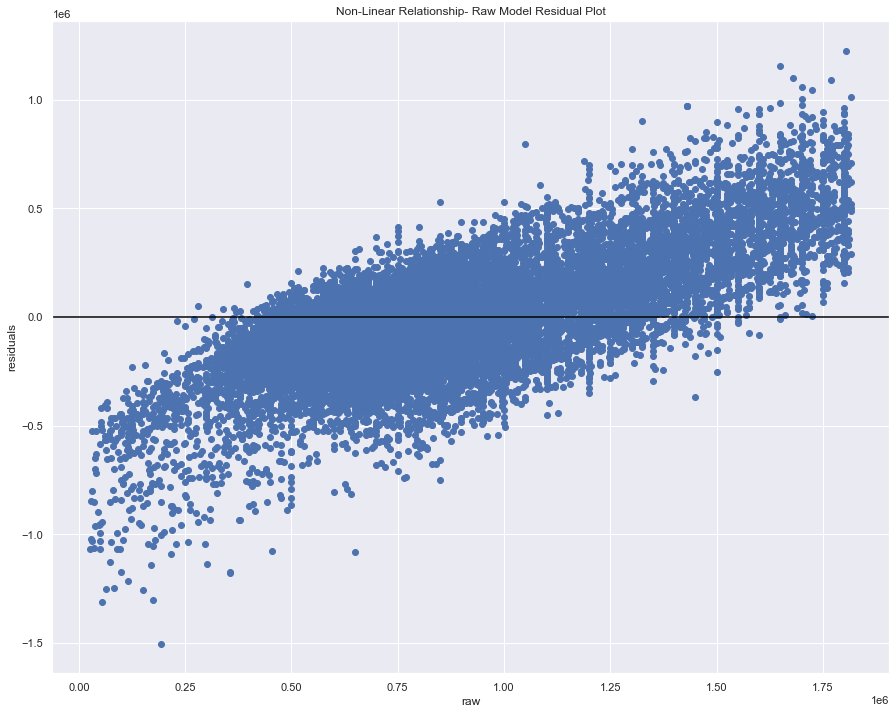

In [345]:
# Analyze coefficiants and p values here
fig, ax = plt.subplots()

ax.scatter(y_raw_cat, cat_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("raw")
ax.set_ylabel("residuals")
ax.set_title("Non-Linear Relationship- Raw Model Residual Plot");

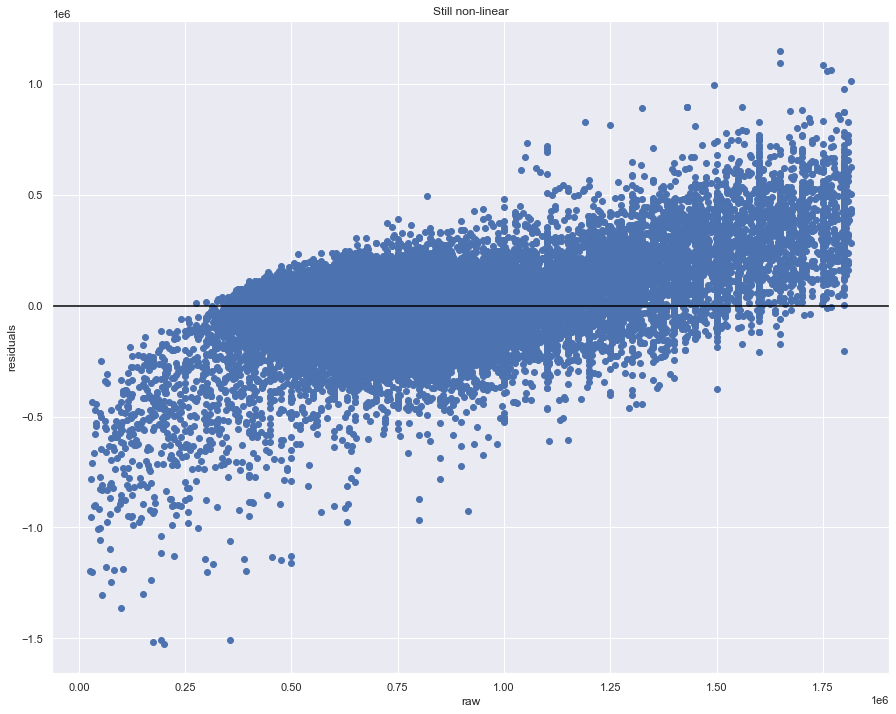

In [328]:
fig, ax = plt.subplots()

ax.scatter(y_baseline, baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("raw")
ax.set_ylabel("residuals")
ax.set_title("Still non-linear");

If our data were normally distributed we would see our residuals scattered across the plot rather than clumped together like we do here.  But our final model is a marked improvement of our all categorical model.

#### Equal Variance/Homoscedasticity
Let's prove that there's a non-linear relationship between the variables in our model and price statistically as well by using a rainbow test.  In a rainbow test, even if the true relationship is non-linear, a good linear fit can be achieved on a subsample in the “middle” of the data, in the arc of the "rainbow".  The null hypothesis is the fit of the model using full sample is the same as using a central subset. The null hypothesis is rejected whenever the overall fit is significantly worse than the fit for the subsample.  A rainbow test returns the f-statistic and p-value, and unlike the way we usually interpret p-values (a low score is good) in this instance, a low score would indicate a non-linear relationship.

In [351]:
import statsmodels.api as sms
 

print("Baseline results:", sms.stats.diagnostic.linear_rainbow(baseline_results))
print("Log results:", sms.stats.diagnostic.linear_rainbow(X_log_results))

Baseline results: (0.9430075587483235, 0.9986754129300249)
Log results: (0.9445674716558311, 0.9982560609610807)


## Recommendations

### Neighborhoods
Using our final model we have identified which neighborhoods we would be able to locate housing that would be in the lowest mean price by zipcode.  We can also see that we'll want to look for houses that are in low to average grade, as we see prices jumping over the median once we've crossed the average threshhold.  Additionally, while we'll want to avoid waterfront homes because of the significant jump in price (about a million dollars), our real estate agent might want to target homes that are located near greenbelts or parks, which have a significantly lower jump in price- around 5,500.

## Next Steps

Affordable housing is a challange to find in the best of times, and often neighborhoods with lower housing prices are located nearby inherant health dangers like freeways or large industrial areas, or lack the kinds of amennities that inhance quality of life, like greenspaces and grocery stores.  Our next steps would be overlay a map of such amenities or dangers over the neighborhoods we've identified as being our most affordable, to analyze the additional benefits and risks of those neighborhoods and to allow our client to have a fuller understanding of its benefits or disadvantages.